# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Write your code here

import pandas as pd
from collections import Counter

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/INFO 5731/imdb_scraped_reviews_clean.csv')  # Replace with your file path
reviews = data['clean_review']

# Function to generate N-grams
def make_ngrams(text, n):
    words = text.split()
    return [tuple(words[i:i+n]) for i in range(len(words)-n+1)]

# Count N-grams for N=2 (bigram) and N=3 (trigram)
bigram_count = Counter()
trigram_count = Counter()

for review in reviews:
    bigram_count.update(make_ngrams(review, 2))
    trigram_count.update(make_ngrams(review, 3))

# Calculate probabilities for bigrams
bigram_probs = {}
for (w1, w2), count in bigram_count.items():
    bigram_probs[(w1, w2)] = count / sum(c for (x, y), c in bigram_count.items() if x == w1)

# Extract noun phrases and calculate relative probabilities
# (Simplified to just count word frequencies as placeholders for "noun phrases")
word_freq = Counter()
for review in reviews:
    word_freq.update(review.split())

max_freq = max(word_freq.values())
review_probs = []

for review in reviews:
    review_word_freq = Counter(review.split())
    rel_probs = {word: freq / max_freq for word, freq in review_word_freq.items()}
    review_probs.append(rel_probs)

# Display results
print("Top 5 Bigrams and Frequencies:")
print(bigram_count.most_common(5))

print("\nTop 5 Trigrams and Frequencies:")
print(trigram_count.most_common(5))

print("\nBigram Probabilities (Sample):")
for k, v in list(bigram_probs.items())[:5]:
    print(f"{k}: {v:.2f}")

print("\nRelative Probabilities of Reviews (Sample):")
for i, probs in enumerate(review_probs[:3]):  # Show first 3 reviews as an example
    print(f"Review {i+1}: {probs}")





Top 5 Bigrams and Frequencies:
[(('dark', 'knight'), 1839), (('knight', 'rise'), 870), (('bruce', 'wayn'), 565), (('christoph', 'nolan'), 561), (('tom', 'hardi'), 540)]

Top 5 Trigrams and Frequencies:
[(('dark', 'knight', 'rise'), 870), (('joseph', 'gordon', 'levitt'), 217), (('tom', 'hardi', 'bane'), 105), (('dark', 'knight', 'trilog'), 86), (('bruce', 'wayn', 'batman'), 81)]

Bigram Probabilities (Sample):
('eight', 'year'): 1.00
('year', 'seclus'): 0.02
('seclus', 'batman'): 0.31
('batman', 'resurfac'): 0.00
('resurfac', 'face'): 0.42

Relative Probabilities of Reviews (Sample):
Review 1: {'eight': 0.0003224766204450177, 'year': 0.0003224766204450177, 'seclus': 0.0003224766204450177, 'batman': 0.002257336343115124, 'resurfac': 0.0003224766204450177, 'face': 0.0006449532408900354, 'bane': 0.0016123831022250886, 'mastermind': 0.0003224766204450177, 'bent': 0.0003224766204450177, 'destroy': 0.0003224766204450177, 'gotham': 0.0003224766204450177, 'tie': 0.0003224766204450177, 'bruce': 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [10]:
# Write your code here

import math

def generate_tfidf_matrix(dataframe, column_name='clean_review'):
    text_data = dataframe[column_name].dropna().tolist()
    tokenized_texts = [text.lower().split() for text in text_data]

    # Calculate Term Frequency (TF)
    tf_list = []
    for text in tokenized_texts:
        word_counts = {}
        total_words = len(text)

        for word in text:
            word_counts[word] = word_counts.get(word, 0) + 1

        tf_scores = {word: count / total_words for word, count in word_counts.items()}
        tf_list.append(tf_scores)

    # Calculate Inverse Document Frequency (IDF)
    idf_dict = {}
    total_docs = len(tokenized_texts)

    for text in tokenized_texts:
        unique_words = set(text)
        for word in unique_words:
            idf_dict[word] = idf_dict.get(word, 0) + 1

    for word in idf_dict:
        idf_dict[word] = math.log(total_docs / (1 + idf_dict[word]))

    # Combine TF and IDF to create TF-IDF scores
    tfidf_list = []
    all_terms = list(idf_dict.keys())

    for tf_scores in tf_list:
        tfidf_scores = {word: tf_scores.get(word, 0) * idf_dict[word] for word in all_terms}
        tfidf_list.append(tfidf_scores)

    # Convert TF-IDF scores into a DataFrame
    tfidf_dataframe = pd.DataFrame(tfidf_list, columns=all_terms)

    return tfidf_dataframe, idf_dict, tokenized_texts

tfidf_matrix, idf_values, tokenized_texts = generate_tfidf_matrix(data)

# Step 2: Compute Query TF-IDF
def compute_query_tfidf(query_text, idf_values):
    query_tokens = query_text.lower().split()

    term_frequencies = {}
    for term in query_tokens:
        term_frequencies[term] = term_frequencies.get(term, 0) + 1

    total_terms = len(query_tokens)
    term_frequencies_normalized = {term: count / total_terms for term, count in term_frequencies.items()}

    query_tfidf_scores = {term: term_frequencies_normalized[term] * idf_values.get(term, 0) for term in term_frequencies_normalized}

    return query_tfidf_scores

# Step 3: Cosine Similarity Function
def calculate_cosine_similarity(vector1, vector2):
    shared_terms = set(vector1.keys()).intersection(set(vector2.keys()))

    dot_product_sum = sum(vector1[term] * vector2[term] for term in shared_terms)
    magnitude_vector1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude_vector2 = math.sqrt(sum(value ** 2 for value in vector2.values()))

    if magnitude_vector1 == 0 or magnitude_vector2 == 0:
        return 0

    return dot_product_sum / (magnitude_vector1 * magnitude_vector2)

# Step 4: Rank Documents by Query Similarity
def rank_documents_by_query(query_text, tfidf_dataframe, idf_values):
    query_tfidf_vector = compute_query_tfidf(query_text, idf_values)

    similarity_scores = []
    for index, doc_row in tfidf_dataframe.iterrows():
        doc_tfidf_vector = doc_row.to_dict()
        similarity_score = calculate_cosine_similarity(query_tfidf_vector, doc_tfidf_vector)
        similarity_scores.append((index, similarity_score))

    similarity_scores_sorted = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    return similarity_scores_sorted

# Define a query
query_string = "outstanding movie with great acting and character development"

# Rank documents based on the query
ranked_documents_results = rank_documents_by_query(query_string, tfidf_matrix, idf_values)

# Display ranked documents and their similarity scores
print("Top 100 Ranked Documents:")
for doc_index, score in ranked_documents_results[:100]:  # Display top 100 results
    print(f"Document {doc_index}:{score:.4f}")

# print(tfidf_matrix)


Ranked Documents:
Document 862:0.1648
Document 934:0.1523
Document 505:0.0477
Document 775:0.0477
Document 465:0.0418
Document 735:0.0418
Document 541:0.0251
Document 811:0.0251
Document 526:0.0212
Document 796:0.0212
Document 832:0.0191
Document 42:0.0186
Document 150:0.0186
Document 328:0.0186
Document 598:0.0186
Document 985:0.0186
Document 55:0.0166
Document 163:0.0166
Document 341:0.0166
Document 611:0.0166
Document 998:0.0166
Document 506:0.0163
Document 776:0.0163
Document 936:0.0163
Document 468:0.0163
Document 738:0.0163
Document 555:0.0154
Document 825:0.0154
Document 504:0.0150
Document 774:0.0150
Document 37:0.0148
Document 145:0.0148
Document 323:0.0148
Document 593:0.0148
Document 980:0.0148
Document 554:0.0142
Document 824:0.0142
Document 888:0.0138
Document 217:0.0130
Document 395:0.0130
Document 665:0.0130
Document 51:0.0128
Document 159:0.0128
Document 337:0.0128
Document 607:0.0128
Document 994:0.0128
Document 67:0.0125
Document 175:0.0125
Document 353:0.0125
Documen

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

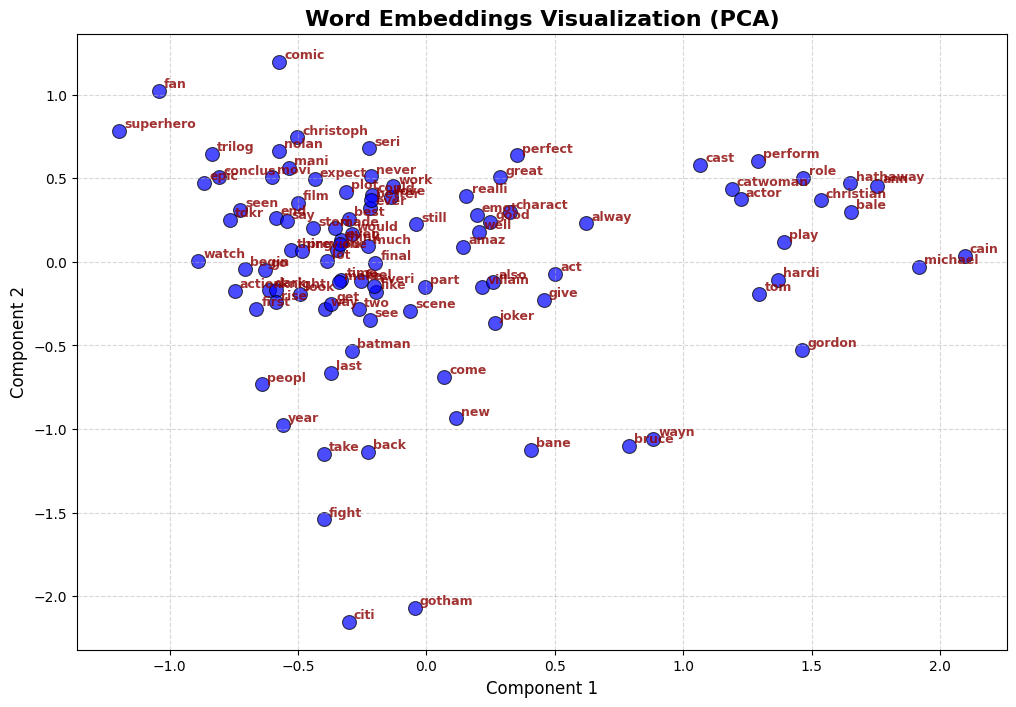

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


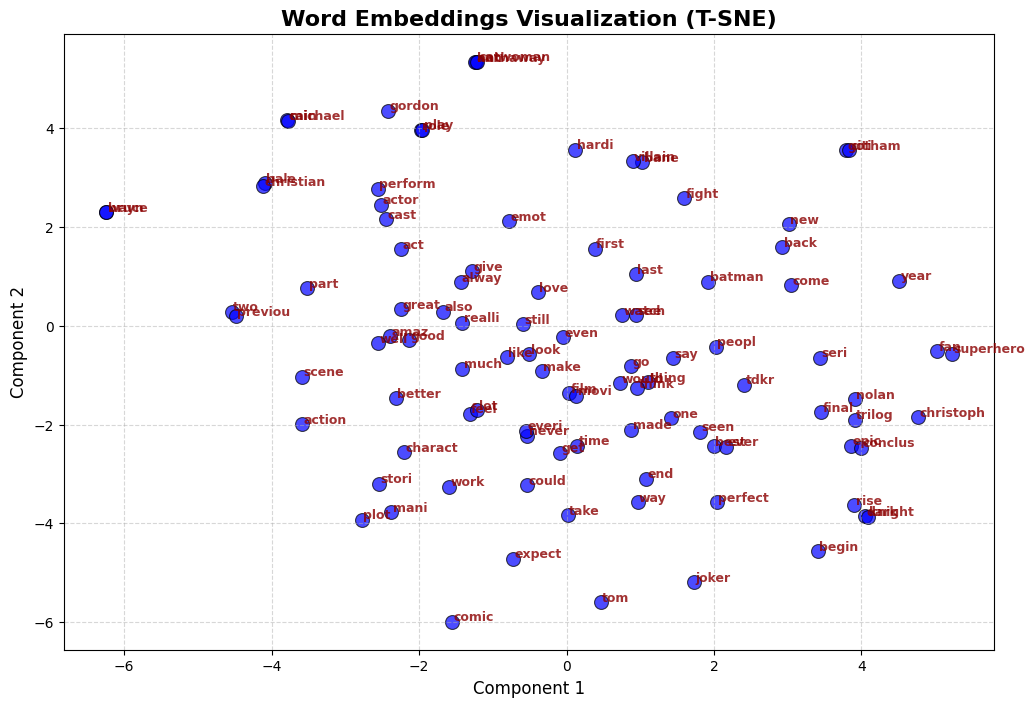

Cosine Similarity between 'batman' and 'joker': 0.3951
Cosine Similarity between 'actor' and 'cast': 0.7869
Cosine Similarity between 'superhero' and 'fan': 0.7157
Cosine Similarity between 'batman' and 'catwoman': 0.3089
Cosine Similarity between 'dark' and 'knight': 0.7743


In [16]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Preprocess the data for Word2Vec
tokenized_sentences = [review.split() for review in reviews]

# Train a 300-dimension Word2Vec model
embedding_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=300,
    window=5,
    min_count=2,
    workers=4,
    sg=1  # sg=1 for skip-gram; sg=0 for CBOW
)

# Save the model for future use (optional)
embedding_model.save("enhanced_word2vec_model_300d.model")

# Enhanced Visualization Function
def enhanced_plot_embeddings(model, method='pca', num_words=100):
    words = list(model.wv.index_to_key)[:num_words]  # Limit to top `num_words` words
    vectors = np.array([model.wv[word] for word in words])

    if method == 'pca':
        reducer = PCA(n_components=2)
        reduced_vectors = reducer.fit_transform(vectors)
        title = "Word Embeddings Visualization (PCA)"
    elif method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
        reduced_vectors = reducer.fit_transform(vectors)
        title = "Word Embeddings Visualization (T-SNE)"
    else:
        raise ValueError("Invalid method. Use 'pca' or 'tsne'.")

    # Enhanced Plotting with Seaborn
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=reduced_vectors[:, 0],
        y=reduced_vectors[:, 1],
        s=100,
        color="blue",
        edgecolor="black",
        alpha=0.7
    )

    # Annotate points with words
    for i, word in enumerate(words):
        plt.text(
            reduced_vectors[i, 0] + 0.02,
            reduced_vectors[i, 1] + 0.02,
            word,
            fontsize=9,
            color="darkred",
            alpha=0.8,
            weight="bold"
        )

    plt.title(title, fontsize=16, weight="bold")
    plt.xlabel("Component 1", fontsize=12)
    plt.ylabel("Component 2", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Visualize using PCA
enhanced_plot_embeddings(embedding_model, method='pca')

# Visualize using T-SNE
enhanced_plot_embeddings(embedding_model, method='tsne')

# Cosine Similarity Function (Unchanged)
def cosine_similarity(word1, word2, model):
    if word1 in model.wv and word2 in model.wv:
        vec1 = model.wv[word1]
        vec2 = model.wv[word2]
        similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        return similarity
    else:
        return None

# Test cosine similarity between a few pairs of words
word_pairs = [('batman', 'joker'), ('actor', 'cast'), ('superhero', 'fan'), ('batman', 'catwoman'), ('dark', 'knight')]
for w1, w2 in word_pairs:
    similarity_score = cosine_similarity(w1, w2, embedding_model)
    if similarity_score is not None:
        print(f"Cosine Similarity between '{w1}' and '{w2}': {similarity_score:.4f}")
    else:
        print(f"One or both words '{w1}' and '{w2}' are not in the vocabulary.")

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



1 - For this dataset, I would perform Sentiment Analysis, which involves automatically determining the emotional tone behind the movie reviews. This task is particularly well-suited for these Batman movie reviews (primarily about "The Dark Knight Rises") because they contain rich emotional responses and opinions about various aspects of the films including acting, plot, direction, and overall enjoyment.



I've used a 3-point sentiment scale to annotate each review:

Positive (1): Reviews expressing clear approval, praise, enjoyment, or positive emotions about the film.

Neutral (0): Reviews presenting balanced opinions, containing mixed sentiments, or primarily stating facts without strong emotional content.

Negative (-1): Reviews expressing clear disapproval, criticism, disappointment, or negative emotions about the film.

The link -

In [24]:
# The GitHub link of your final csv file


# Link: https://github.com/STAVAN-2710/INFO-5731/blob/main/sentiment_doc.csv


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [17]:
# This challenge was fairly easy and not as challenging as the one before. I enjoyed creawting tfidf and word2vec as it was more
# intuitive. The time give was enough to complete this on time.